### **IBM 312 : Group Assignment**
#### **Group 18** : **Anime Recommendation System Using PCA and KMeans**
```	
	- Archit Isham						 - 20312008
	- Manas Misra						 - 20312019
	- Samyak Kamlakar Wanjarwadkar		                 - 20312030
	- Uddipt Gupta						 - 20312038

```


In [142]:
##Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### **Loading Data...**

In [143]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [144]:
anime = anime.rename(columns={"MAL_ID": "anime_id"})
anime = anime[['anime_id','Name','Score','Genres','Type','Episodes']]
anime.head()

,anime_id,Name,Score,Genres,Type,Episodes
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52


In [145]:
rating.rename(columns = {'rating':'user_rating'}, inplace = True) 
rating = rating[rating['user_rating']>=0]

print(rating.info())
print("\n---------------------------------------\nrating.head() : \n",rating.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int64
 1   anime_id     int64
 2   user_rating  int64
dtypes: int64(3)
memory usage: 1.7 GB
None

---------------------------------------
rating.head() : 
    user_id  anime_id  user_rating
0        0       430            9
1        0      1004            5
2        0      3010            7
3        0       570            7
4        0      2762            9


Cleaning the data : 

In [146]:
# Creating table which holds sum of all ratings given by a user, and recieved by an anime : 
user_id_freq = rating['user_id'].value_counts()
anime_id_freq = rating['anime_id'].value_counts()

# Considering only active users and famous animes(atleast 200 ratings recieved) :
rating = rating[rating['user_id'].isin(user_id_freq[user_id_freq >= 500].index)].copy()
rating = rating[rating['anime_id'].isin(anime_id_freq[anime_id_freq >= 200].index)].copy()

#### **Merging the two datasets using "anime_id" as foreign key** :

In [147]:
merge_data = rating.merge(anime, left_on = 'anime_id', right_on = 'anime_id', how = 'left')
merge_data.head()

# UNCOMMENT/COMMENT BELOW TO HAVE A DETAILED LOOK AT THE merge.csv data file
# merge_data.to_csv('merge_data.csv') 

,user_id,anime_id,user_rating,Name,Score,Genres,Type,Episodes
0,17,5781,7,Isekai no Seikishi Monogatari,7.84,"Action, Comedy, Ecchi, Fantasy, Harem, Mecha, ...",OVA,13
1,17,6682,10,11eyes,6.16,"Action, Ecchi, Super Power, Supernatural",TV,12
2,17,14199,2,Oniichan dakedo Ai sae Areba Kankeinai yo ne!,6.53,"Comedy, Ecchi, Harem, Romance, School",TV,12
3,17,12355,6,Ookami Kodomo no Ame to Yuki,8.64,"Fantasy, Slice of Life",Movie,1
4,17,23673,6,Ookami Shoujo to Kuro Ouji,7.17,"Comedy, Romance, School, Shoujo",TV,12


In [148]:
print("\nNumber of unique anime in merged data: ", len(merge_data['anime_id'].unique()))
print("\nNumber of unique anime in original data: ", len(anime['anime_id'].unique()))

print("\nLoss in number of anime because they werent rated by user")


Number of unique anime in merged data:  9076

Number of unique anime in original data:  17562

Loss in number of anime because they werent rated by user


#### **Creating the Pivot Table :**

Rows represent `user_id`, and `columns` are animes, each cell is the `user_rating` given by a user to that particular anime.

In [149]:
pivot_table = merge_data.pivot_table(index='user_id', columns='Name', values='user_rating').fillna(0)
pivot_table.head(10)

# UNCOMMENT/COMMENT BELOW TO HAVE A DETAILED LOOK AT THE pivot_table.csv data file
# pivot_table.to_csv('pivot_table.csv')

Name,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""","""Eiyuu"" Kaitai",** Kouhai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
user_id,,,,,,,,,,,,,,,,,,,,,
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,9.0,7.0,9.0,8.0,0.0,0.0


In [150]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23004 entries, 17 to 353398
Columns: 9076 entries, "0" to ◯
dtypes: float64(9076)
memory usage: 1.6 GB


#### **Principal Component Analysis**

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(pivot_table)
pca_samples = pca.transform(pivot_table)

In [152]:
kmeans_data = pd.DataFrame(pca_samples)
kmeans_data.head()

,0,1,2
0,18.283338,10.589647,-43.192060
1,-20.811781,3.307580,33.605849
2,-35.786423,-21.258067,-27.513378
3,18.301517,-45.883164,28.164686
4,-29.390830,-46.821976,18.533562


#### **Visualing The Data after PCA**

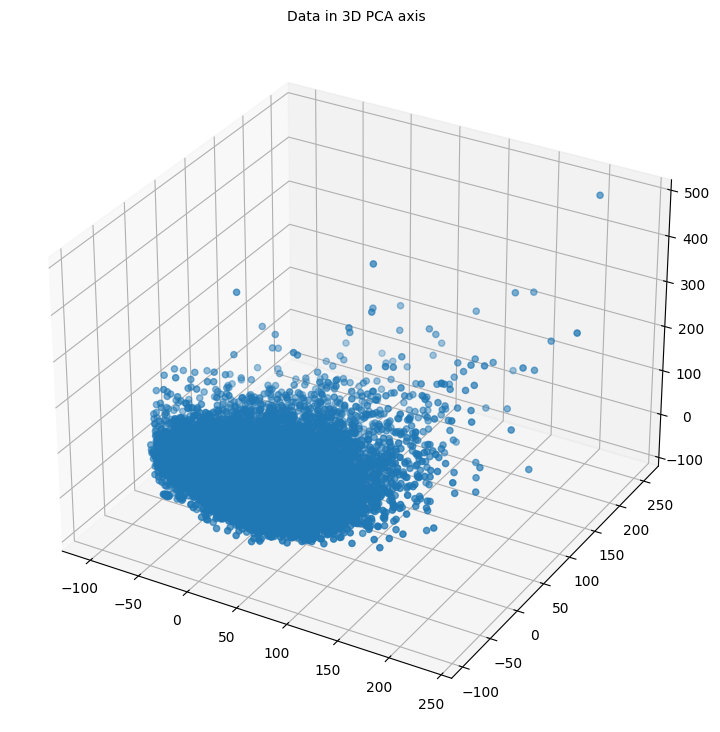

In [153]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(kmeans_data[0],kmeans_data[2],kmeans_data[1])

plt.title('Data in 3D PCA axis', fontsize = 10)
plt.show()

#### **KMeans Clustering**

##### Using Elbow Method for optimal number of clusters : 

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

db = {}
inertia_list = np.empty(11)

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(kmeans_data)
    inertia_list[i] = kmeans.inertia_
    db[i] = davies_bouldin_score(kmeans_data, kmeans.labels_)

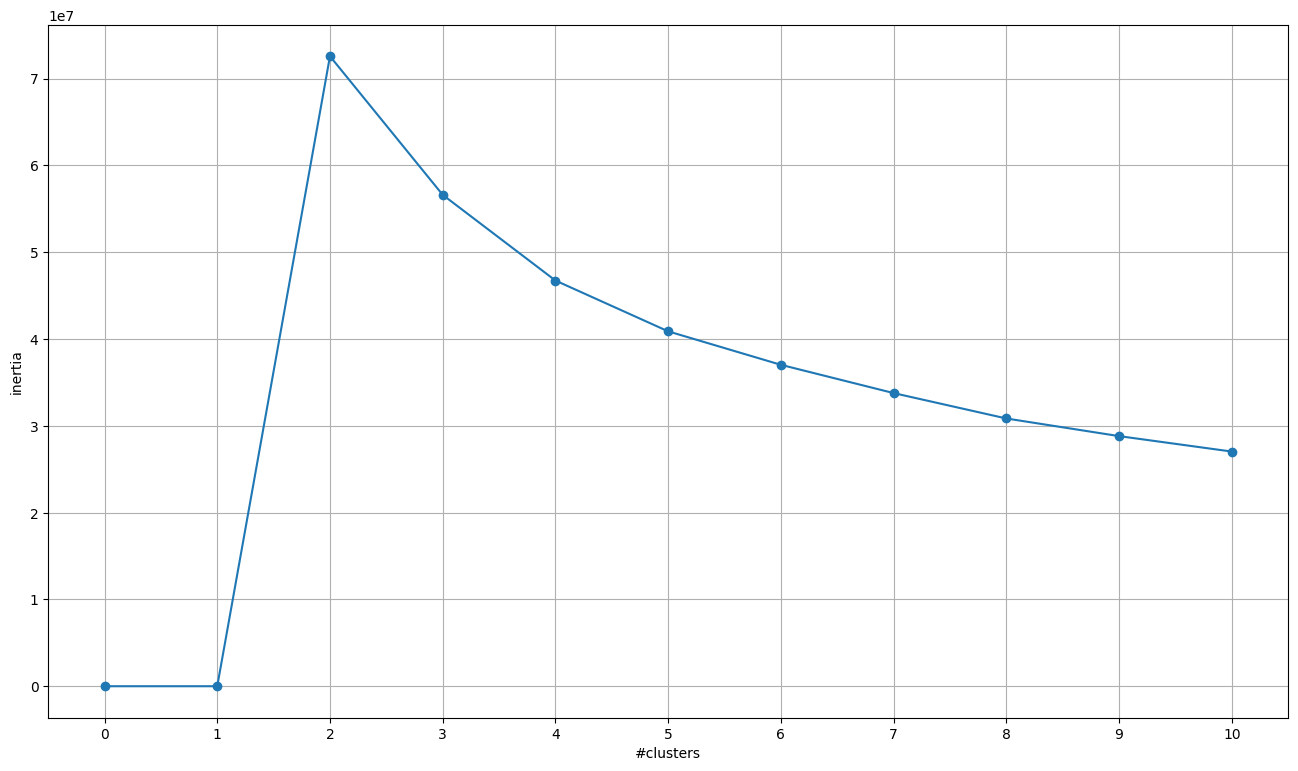

In [155]:
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('#clusters')
plt.ylabel('inertia')
plt.xticks(range(0,11))
plt.yticks()
plt.grid()
plt.show()

**Elbow at k = 4**

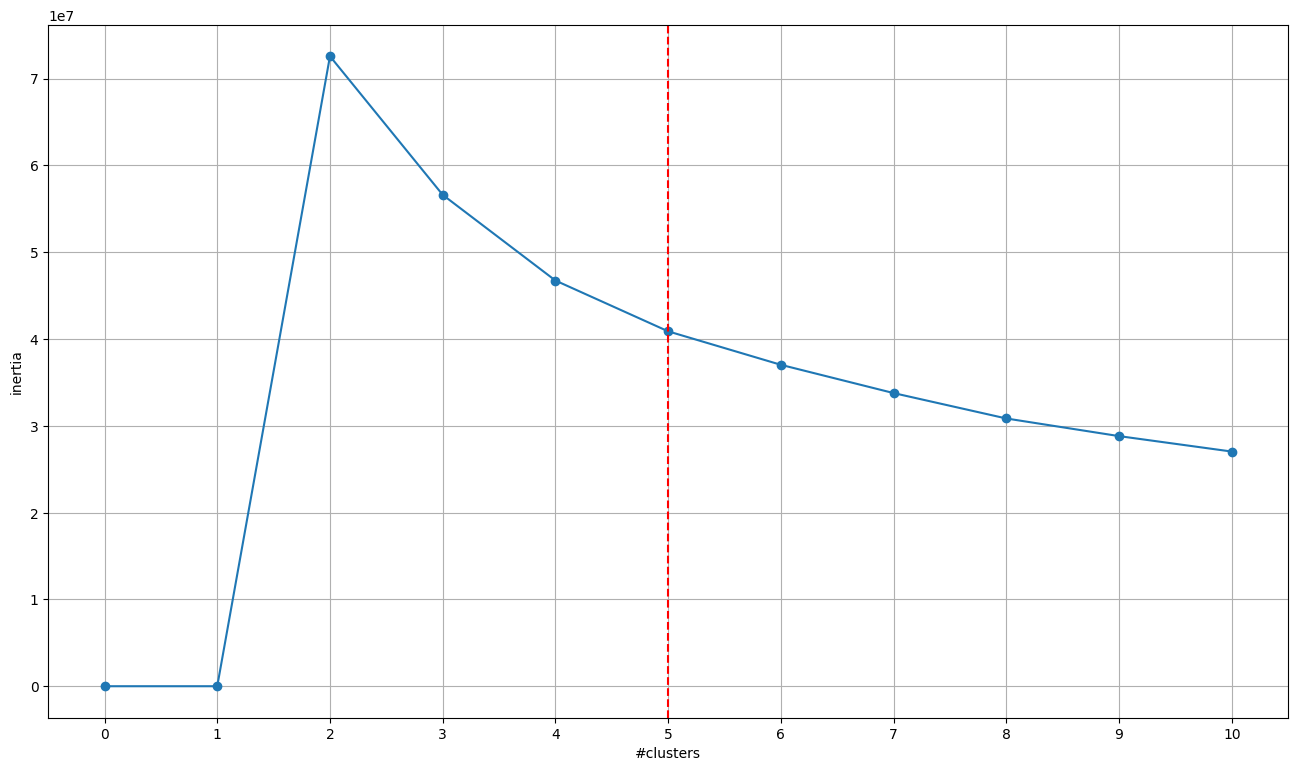

In [156]:
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('#clusters')
plt.ylabel('inertia')
plt.xticks(range(0,11))
plt.yticks()
plt.grid()
plt.axvline(x = 5, color = 'red', linestyle = '--')
plt.show()

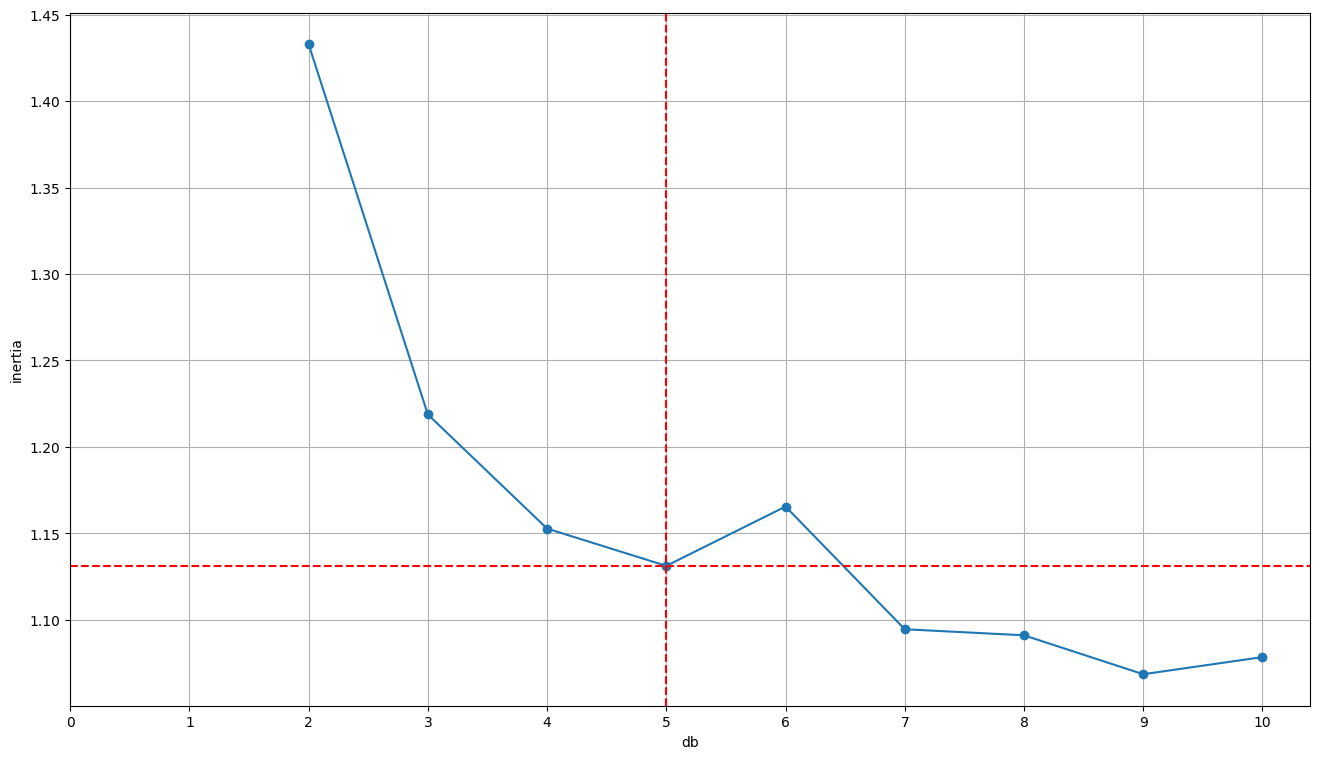

In [157]:
plt.plot(list(db.keys()), list(db.values()), marker='o')
plt.grid()
plt.xlabel('db')
plt.ylabel('inertia')
plt.xticks(range(0,11))
plt.yticks()
plt.axvline(x = 5, color = 'red', linestyle = '--')
plt.axhline(y = db[5], color = 'red', linestyle = '--')

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [158]:
clusterer = KMeans(n_clusters = 5 , random_state = 18)
clusterer.fit(kmeans_data)

labels = clusterer.labels_
centers = clusterer.cluster_centers_

In [159]:
print(centers)

[[ -7.21721971 -25.79710373  20.24071909]
 [ 62.03489115  64.45721243  34.75507945]
 [ -6.55024483  27.83918636 -33.33034091]
 [ 38.56196292 -21.83005827 -15.37180999]
 [-52.65731992  12.71710928   6.28189037]]


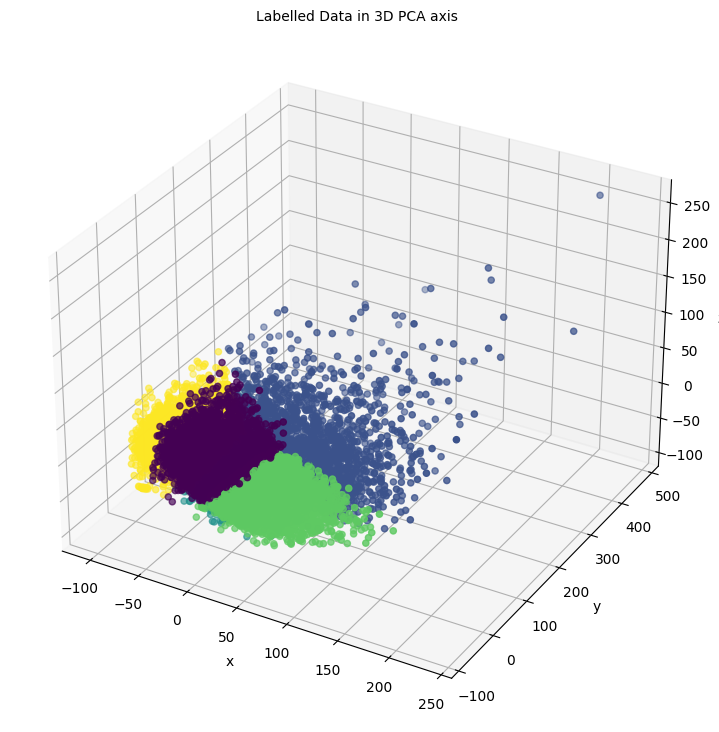

In [160]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.scatter3D(kmeans_data[0], kmeans_data[1], kmeans_data[2], c = labels)
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.grid()
plt.title('Labelled Data in 3D PCA axis', fontsize = 10)
plt.show()

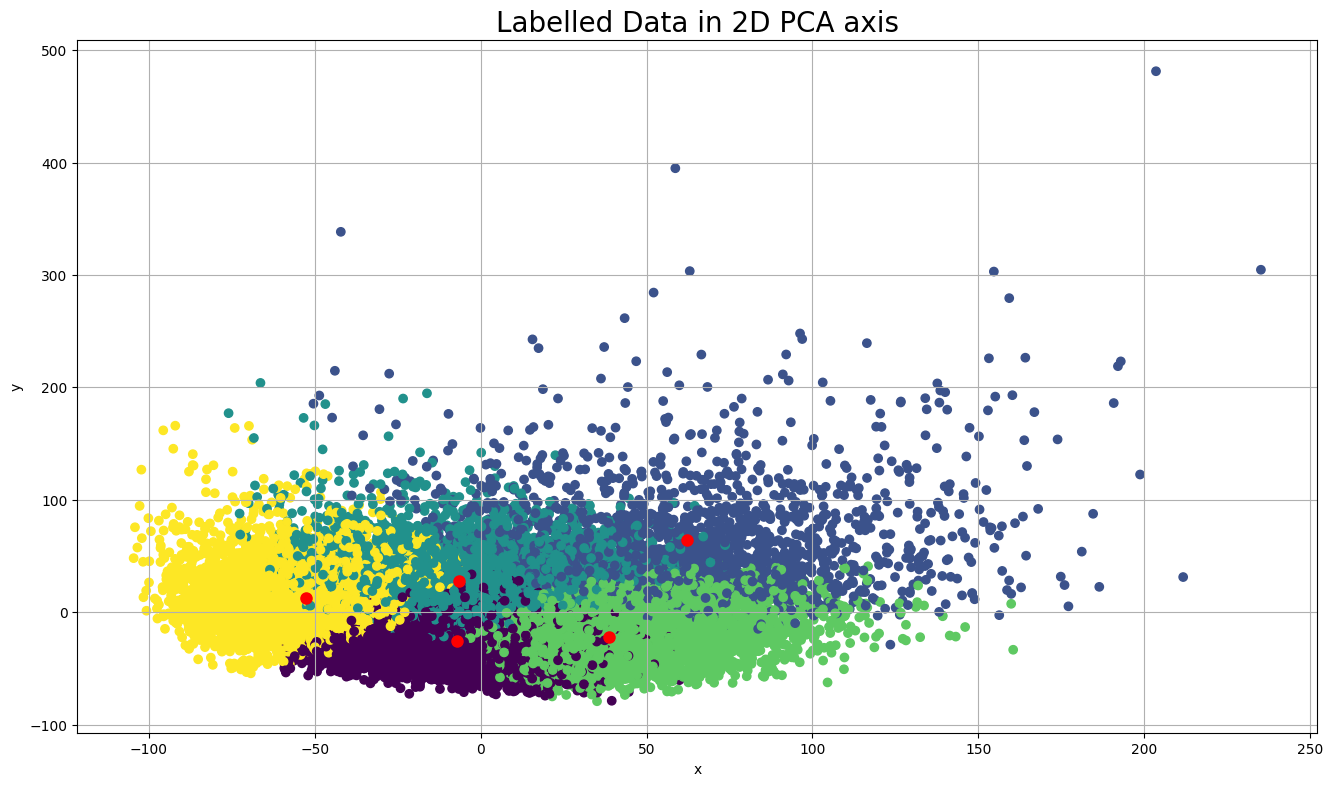

In [161]:
fig = plt.figure(figsize=(16,9))
plt.scatter(kmeans_data[0], kmeans_data[1] , c = labels)

for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color = 'red', alpha = 1)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Labelled Data in 2D PCA axis', fontsize = 20)
plt.show()

In [162]:
# Adding the column 'cluster' to the cross-table indicating the cluster a user belongs to.
pivot_table['cluster'] = labels
pivot_table.head(10)

Name,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""","""Eiyuu"" Kaitai",** Kouhai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
146,0.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,9.0,7.0,9.0,8.0,0.0,0.0,4


#### **Analyzing each cluster**

In [163]:
c0 = pivot_table[pivot_table['cluster'] == 0].drop('cluster',axis = 1)
c1 = pivot_table[pivot_table['cluster'] == 1].drop('cluster',axis = 1)
c2 = pivot_table[pivot_table['cluster'] == 2].drop('cluster',axis = 1)
c3 = pivot_table[pivot_table['cluster'] == 3].drop('cluster',axis = 1)
c4 = pivot_table[pivot_table['cluster'] == 4].drop('cluster',axis = 1)

In [164]:
c0.head()

Name,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""","""Eiyuu"" Kaitai",** Kouhai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
user_id,,,,,,,,,,,,,,,,,,,,,
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
c0_mean = c0.mean().sort_values(ascending=False)
c1_mean = c1.mean().sort_values(ascending=False)
c2_mean = c2.mean().sort_values(ascending=False)
c3_mean = c3.mean().sort_values(ascending=False)
c4_mean = c4.mean().sort_values(ascending=False)

In [166]:
print("\nC0_Mean : \n",c0_mean.head(10))


C0_Mean : 
 Name
Shingeki no Kyojin                       7.761009
One Punch Man                            7.744343
Fullmetal Alchemist: Brotherhood         7.497248
Steins;Gate                              7.486697
Kimi no Na wa.                           7.464679
Death Note                               7.450306
Koe no Katachi                           7.166055
Boku dake ga Inai Machi                  7.062232
Boku no Hero Academia                    7.008104
Re:Zero kara Hajimeru Isekai Seikatsu    6.954587
dtype: float64


**Looking up information of anime in each cluster from "anime.csv"**

In [167]:
print("\nC1_Mean : \n",c1_mean.head(10))


C1_Mean : 
 Name
Steins;Gate                           8.774247
Angel Beats!                          8.357860
Fullmetal Alchemist: Brotherhood      8.343367
Code Geass: Hangyaku no Lelouch       8.340580
One Punch Man                         8.334448
Shingeki no Kyojin                    8.309922
No Game No Life                       8.292642
Code Geass: Hangyaku no Lelouch R2    8.255295
Toradora!                             8.140468
Bakemonogatari                        8.132664
dtype: float64


In [168]:
print("\nC2_Mean : \n",c2_mean.head(10))


C2_Mean : 
 Name
Angel Beats!                          8.038861
Toradora!                             7.920830
Code Geass: Hangyaku no Lelouch       7.661598
Bakemonogatari                        7.542843
Clannad                               7.476225
Code Geass: Hangyaku no Lelouch R2    7.421675
Sword Art Online                      7.407917
No Game No Life                       7.395607
Steins;Gate                           7.307024
Boku wa Tomodachi ga Sukunai          7.218441
dtype: float64


In [169]:
print("\nC3_Mean : \n",c3_mean.head(10))


C3_Mean : 
 Name
No Game No Life                                             8.640148
Re:Zero kara Hajimeru Isekai Seikatsu                       8.364615
Kono Subarashii Sekai ni Shukufuku wo!                      8.225613
One Punch Man                                               8.159287
Angel Beats!                                                8.023461
Kono Subarashii Sekai ni Shukufuku wo! 2                    7.916035
Sword Art Online                                            7.911801
Shingeki no Kyojin                                          7.897336
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka    7.850591
Yahari Ore no Seishun Love Comedy wa Machigatteiru.         7.846181
dtype: float64


In [170]:
print("\nC4_Mean : \n",c4_mean.head(10))


C4_Mean : 
 Name
Sen to Chihiro no Kamikakushi       7.402635
Death Note                          7.082956
Code Geass: Hangyaku no Lelouch     6.924043
Mononoke Hime                       6.889049
Fullmetal Alchemist: Brotherhood    6.853026
Cowboy Bebop                        6.626389
Howl no Ugoku Shiro                 6.586661
Toki wo Kakeru Shoujo               6.455537
Tengen Toppa Gurren Lagann          6.447715
Neon Genesis Evangelion             6.413956
dtype: float64


In [171]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list   = list()
    type_list    = list()
    score_list   = list()
    
    for x in anime['Name']:
        if x in animelist:
            episode_list.append(anime[anime['Name']==x].Episodes.values)
            type_list.append(anime[anime['Name']==x].Type.values)
            score_list.append(anime[anime['Name']==x].Score.values)
            for y in anime[anime['Name']==x].Genres.values:
                 genre_list.append(y)
    
    return genre_list,episode_list,score_list,type_list

In [172]:
animelist = list(c0_mean[0:50].index)
data = pd.DataFrame()
data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)

In [173]:
data.head()

,Genres,Episodes,Score,Type
0,"Adventure, Supernatural, Drama",[1],[8.83],[Movie]
1,"Mystery, Police, Psychological, Supernatural, ...",[37],[8.63],[TV]
2,"Action, Military, Sci-Fi, Super Power, Drama, ...",[25],[8.72],[TV]
3,"Action, Adventure, Comedy, Mecha, Sci-Fi",[27],[8.66],[TV]
4,"Action, Military, Sci-Fi, Super Power, Drama, ...",[25],[8.91],[TV]


In [174]:
def count_word(df, set_keywords):
    keyword_count = dict()
    for s in set_keywords: keyword_count[s] = 0
    for keywords in df['Genres'].str.split(','):        
        if type(keywords) == float and pd.isnull(keywords): continue        
        for s in [s for s in keywords if s in set_keywords]: 
            if pd.notnull(s): keyword_count[s] += 1
    
    keyword_freq = []
    for k,v in keyword_count.items():
        keyword_freq.append([k,v])
    keyword_freq.sort(key = lambda x:x[1], reverse = True)
    return keyword_freq, keyword_count

In [175]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()
    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(
                      width = 1600,
                      height = 900, 
                      background_color = color, 
                      max_words = 30,
                      max_font_size = 500, 
                      normalize_plurals = False)
        wordcloud.generate_from_frequencies(words)

    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [176]:
def getKeywords(df) :
    set_keywords = set()
    for keywords in df['Genres'].str.split(',').values:
        if isinstance(keywords, float): continue  # only happen if liste_keywords = NaN
        set_keywords = set_keywords.union(keywords)
    return set_keywords
    

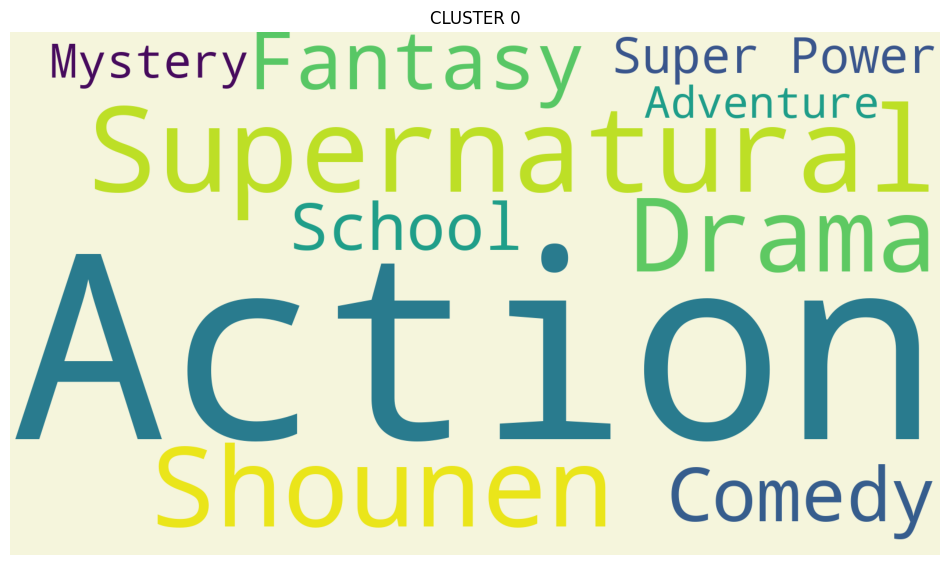

In [177]:
c0_data = pd.DataFrame()
animelist = list(c0_mean[0:50].index)
c0_data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)
keyword_occurences, _ = count_word(c0_data, getKeywords(c0_data))
makeCloud(keyword_occurences[0:10],"CLUSTER 0","beige")

In [178]:
keyword_occurences[0:15]

[['Action', 27],
 [' Supernatural', 22],
 [' Shounen', 19],
 [' Drama', 19],
 [' Fantasy', 17],
 [' Comedy', 15],
 [' School', 11],
 [' Super Power', 11],
 [' Mystery', 10],
 [' Adventure', 9],
 [' Psychological', 8],
 [' Magic', 7],
 [' Sci-Fi', 7],
 [' Military', 7],
 [' Thriller', 6]]

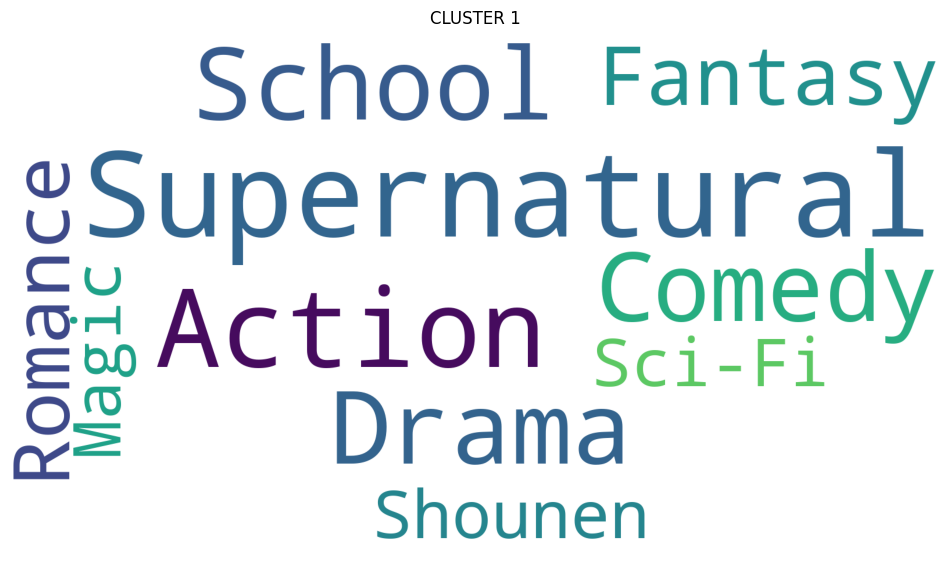

In [179]:
c1_data = pd.DataFrame()
animelist = list(c1_mean[0:50].index)
c1_data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)
keyword_occurences, _ = count_word(c1_data, getKeywords(c1_data))
makeCloud(keyword_occurences[0:10],"CLUSTER 1","white")

In [180]:
keyword_occurences[0:15]

[[' Supernatural', 24],
 ['Action', 20],
 [' School', 17],
 [' Drama', 17],
 [' Comedy', 17],
 [' Fantasy', 14],
 [' Romance', 13],
 [' Shounen', 9],
 [' Magic', 9],
 [' Sci-Fi', 9],
 [' Adventure', 8],
 ['Slice of Life', 7],
 [' Mystery', 7],
 ['Comedy', 6],
 [' Thriller', 6]]

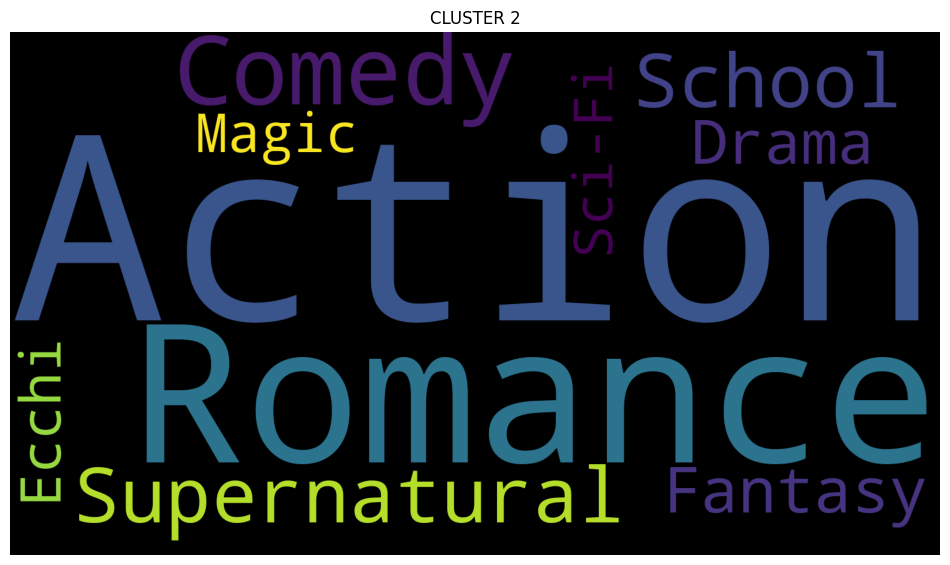

In [181]:
c2_data = pd.DataFrame()
animelist = list(c2_mean[0:50].index)
c2_data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)
keyword_occurences, _ = count_word(c2_data, getKeywords(c2_data))
makeCloud(keyword_occurences[0:10],"CLUSTER 2","black")

In [182]:
keyword_occurences[0:15]

[['Action', 24],
 [' Romance', 23],
 [' Comedy', 21],
 [' Supernatural', 21],
 [' School', 20],
 [' Fantasy', 14],
 [' Drama', 13],
 [' Ecchi', 11],
 [' Magic', 10],
 [' Sci-Fi', 10],
 [' Shounen', 9],
 [' Harem', 9],
 [' Adventure', 8],
 ['Comedy', 8],
 [' Super Power', 8]]

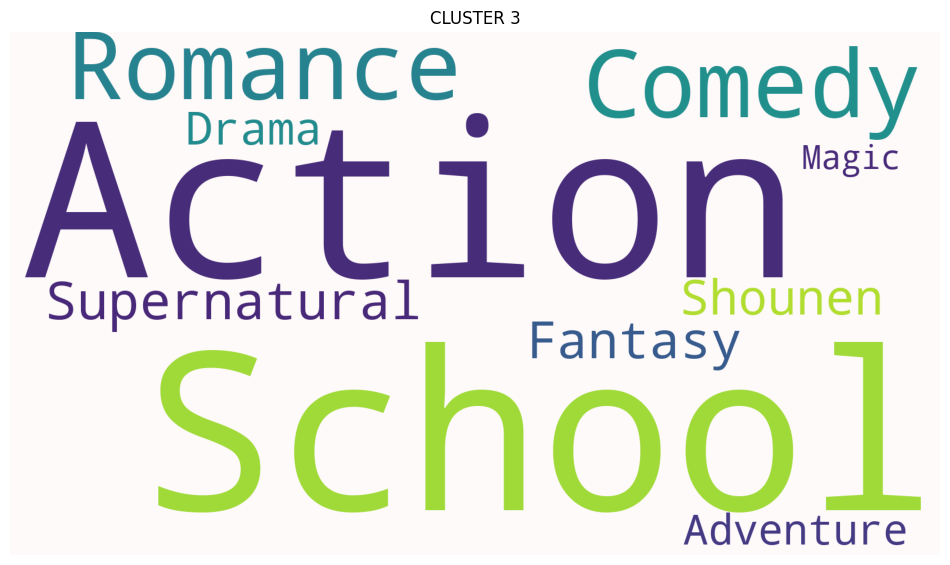

In [183]:
c3_data = pd.DataFrame()
animelist = list(c3_mean[0:50].index)
c3_data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)
keyword_occurences, _ = count_word(c3_data, getKeywords(c3_data))
makeCloud(keyword_occurences[0:10],"CLUSTER 3","snow")

In [184]:
keyword_occurences[0:15]

[[' School', 25],
 ['Action', 24],
 [' Romance', 20],
 [' Comedy', 20],
 [' Supernatural', 19],
 [' Fantasy', 18],
 [' Shounen', 16],
 [' Drama', 14],
 [' Adventure', 12],
 [' Magic', 7],
 [' Super Power', 7],
 ['Slice of Life', 6],
 [' Mystery', 6],
 [' Sci-Fi', 5],
 [' Ecchi', 5]]

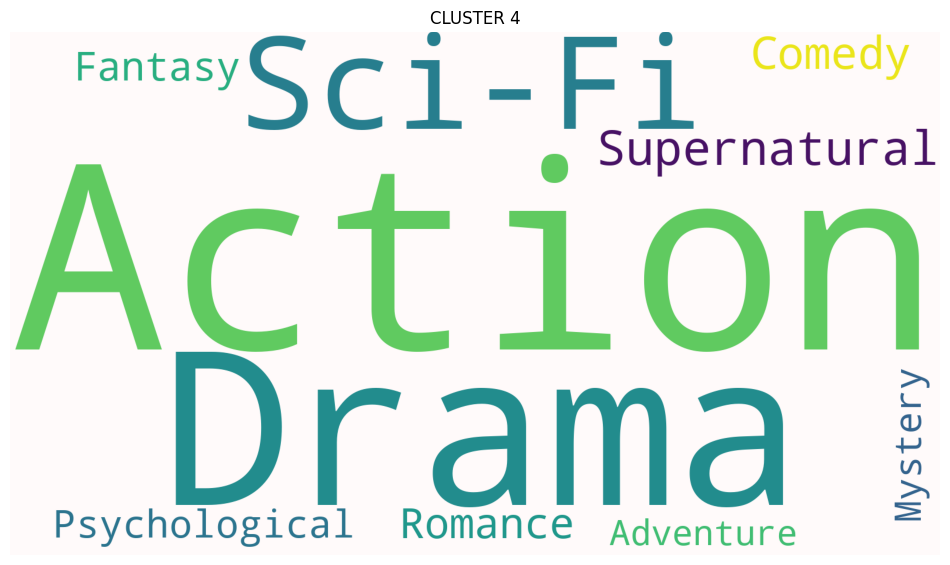

In [185]:
c4_data = pd.DataFrame()
animelist = list(c4_mean[0:50].index)
c4_data['Genres'],data['Episodes'],data['Score'],data['Type'] =  createAnimeInfoList(animelist)
keyword_occurences, _ = count_word(c4_data, getKeywords(c4_data))
makeCloud(keyword_occurences[0:10],"CLUSTER 4","snow")

In [186]:
keyword_occurences[0:15]

[['Action', 25],
 [' Drama', 20],
 [' Sci-Fi', 18],
 [' Supernatural', 16],
 [' Comedy', 14],
 [' Romance', 12],
 [' Fantasy', 11],
 [' Psychological', 10],
 [' Mystery', 9],
 [' Adventure', 8],
 ['Adventure', 8],
 [' Mecha', 7],
 [' Shounen', 6],
 [' School', 6],
 [' Seinen', 6]]

### **Making recommendations for a random user**

In [187]:
# Pick a user ID from the dataset
uid = 19

# Get all of this user's ratings
user_ratings  = merge_data.loc[merge_data['user_id'] == uid].sort_values(by=['user_rating'],ascending = False)
user_ratings

,user_id,anime_id,user_rating,Name,Score,Genres,Type,Episodes
845,19,2129,10,True Tears,7.36,"Drama, Romance, School",TV,13
902,19,543,10,Vampire Hunter D (2000),7.89,"Action, Sci-Fi, Horror, Drama, Romance, Vampir...",Movie,1
887,19,10521,10,Working'!!,7.87,"Comedy, Romance, Seinen, Slice of Life",TV,13
1072,19,15809,10,Hataraku Maou-sama!,7.83,"Comedy, Demons, Supernatural, Romance, Fantasy",TV,13
1184,19,16001,10,Kokoro Connect: Michi Random,8.01,"Comedy, Drama, Romance, School, Slice of Life,...",Special,4
...,...,...,...,...,...,...,...,...
1168,19,221,3,Mezzo Forte,6.65,"Action, Comedy, Hentai, Sci-Fi",OVA,2
772,19,21771,2,Romantica Clock,5.72,Shoujo,Special,3
867,19,6505,2,There She Is!!,7.93,"Comedy, Romance",ONA,5
1319,19,8577,1,Aki-Sora: Yume no Naka,6.09,"Romance, Ecchi, Seinen",OVA,2


In [188]:
x = pivot_table.copy()
x.insert(0,column='idx',value=range(0,23004))
temp = x.loc[uid]
y = temp[0]
y               #index of uid in pivot table and also in kmeans_data

1.0

In [189]:
coords = kmeans_data.iloc[[y]]
coords          #3d vector obtained after PCA for this user

,0,1,2
1,-20.811781,3.30758,33.605849


In [190]:
cluster = clusterer.predict(coords)
cluster

array([0])

Hence uid #2303 lies in cluster 1

In [191]:
c0_top = list(c0_mean[0:200].index)  #top animes in cluster 0
c0_top[0:15]

['Shingeki no Kyojin',
 'One Punch Man',
 'Fullmetal Alchemist: Brotherhood',
 'Steins;Gate',
 'Kimi no Na wa.',
 'Death Note',
 'Koe no Katachi',
 'Boku dake ga Inai Machi',
 'Boku no Hero Academia',
 'Re:Zero kara Hajimeru Isekai Seikatsu',
 'Shingeki no Kyojin Season 2',
 'No Game No Life',
 'Boku no Hero Academia 2nd Season',
 'Sen to Chihiro no Kamikakushi',
 'Code Geass: Hangyaku no Lelouch']

In [192]:
anime_watched_by_uid = user_ratings['Name'].tolist()
anime_watched_by_uid[0:15]

['True Tears',
 'Vampire Hunter D (2000)',
 "Working'!!",
 'Hataraku Maou-sama!',
 'Kokoro Connect: Michi Random',
 'Working!!',
 'Kokoro Connect',
 'Vinland Saga',
 'Koe no Katachi',
 'Clannad: After Story',
 'Howl no Ugoku Shiro',
 'Kiseijuu: Sei no Kakuritsu',
 'Code Geass: Hangyaku no Lelouch',
 'Sakasama no Patema',
 'Samurai 7']

In [193]:
recs = [] #Array containing recommendations, sorted by avg Score in that cluster

for s in c0_top:
    if s not in anime_watched_by_uid:
        recs.append(s)

recs[0:15]

['Death Note',
 'Boku no Hero Academia 2nd Season',
 'Boku no Hero Academia 3rd Season',
 'Hunter x Hunter (2011)',
 'Haikyuu!!',
 'Ansatsu Kyoushitsu',
 'Shokugeki no Souma: Ni no Sara',
 'Haikyuu!! Second Season',
 'Neon Genesis Evangelion',
 'Ansatsu Kyoushitsu 2nd Season',
 'Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou',
 'Ao no Exorcist',
 'Dr. Stone',
 'Naruto',
 'Magi: The Labyrinth of Magic']